# Predicting Customer Credit Mix - End-to-End Machine Learning Workflow

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


## 2. Load the Dataset

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Bank%20Data.csv'
df = pd.read_csv(url)
print(df.head())


       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0      

## 3. Data Preprocessing

### 3.1 Handling Missing Values

In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with the mean and categorical with the mode
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64


### 3.2 Encoding Categorical Variables

In [4]:
# Label encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


### 3.3 Scaling Numeric Features

In [5]:
# Scale numerical features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


## 4. Exploratory Data Analysis (EDA)

### 4.1 Visualizing Data

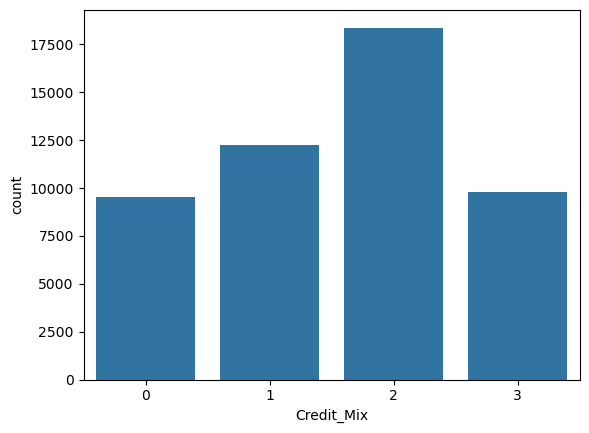

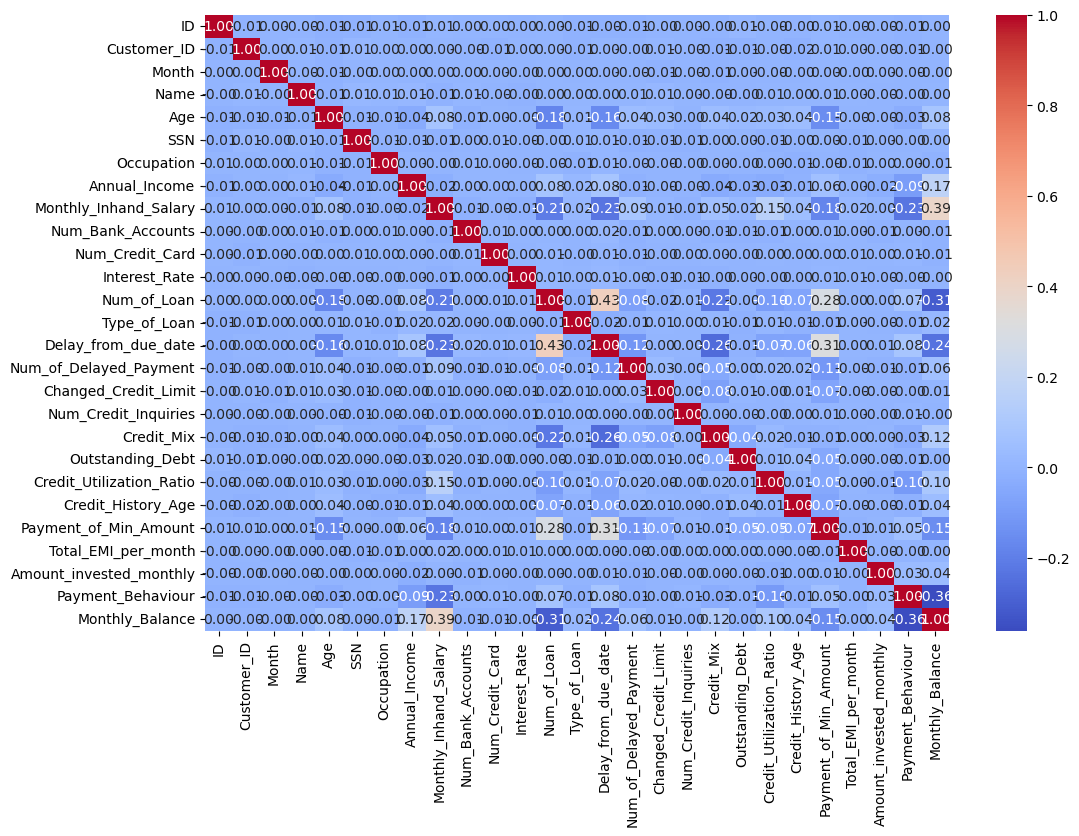

In [6]:
# Distribution of the target variable
sns.countplot(x='Credit_Mix', data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


## 5. Splitting the Dataset

In [7]:
X = df.drop(['Credit_Mix'], axis=1)
y = df['Credit_Mix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6. Model Building

### 6.1 Training the Model

In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 6.2 Evaluating the Model

In [9]:
# Predictions and performance
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1848    0   30   42]
 [   0 2356   43   59]
 [  52   98 3384  121]
 [ 441  601  872   53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1920
           1       0.77      0.96      0.85      2458
           2       0.78      0.93      0.85      3655
           3       0.19      0.03      0.05      1967

    accuracy                           0.76     10000
   macro avg       0.63      0.72      0.65     10000
weighted avg       0.66      0.76      0.70     10000



## 7. Actionable Insights

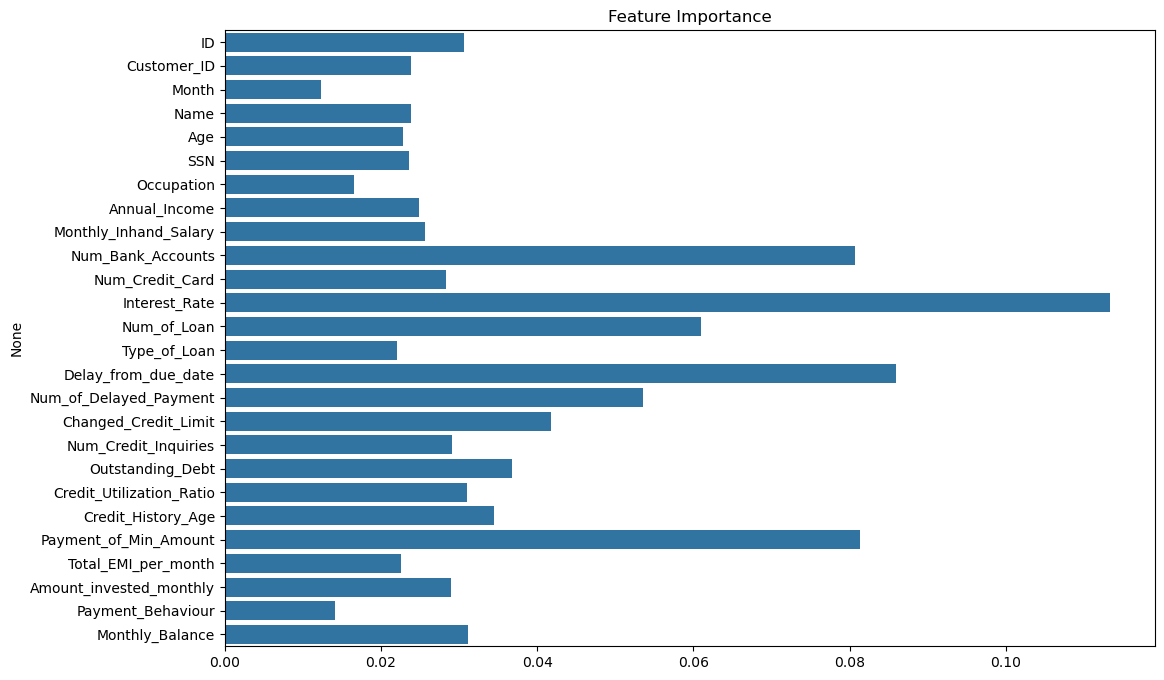

Insights:
- Improve payment behavior to reduce missed payments.
- Optimize credit utilization ratio below 30%.


In [10]:
# Feature importance
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

# Suggest specific improvements based on key factors like payment behavior or credit utilization
print("Insights:")
print("- Improve payment behavior to reduce missed payments.")
print("- Optimize credit utilization ratio below 30%.")
